# Imports

In [1]:
library(tidyverse) # Tidyverse!
library(corrr) # "Tidy" approach to correlation matrices
library(haven) # Imports SPSS files
library(lavaan) # Structural Equation Modelling (SEM) package used for Confirmatory Factor Analysis (CFA)
library(semPlot) # Plots results of SEM/CFA
library(psych) # Reliability Analysis

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

This is lavaan 0.6-6

lavaan is BETA software! Please report any bugs.

Registered S3 methods overwritten by 'huge':
  method    from   
  plot.sim  BDgraph
  print.sim BDgraph


Attaching package: ‘psych’


The following object is masked from ‘package:lavaan’:

    cor2cov


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




## Plotting Parameters


In [2]:
options(repr.plot.width=9, repr.plot.height=6)

# Load Data

---
Note that data is cleaned in `fr_clustering_R` script.

In [3]:
dataset = read_csv("data/cluster_cleaned.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  demo_time = col_character(),
  demo_ethnicity = col_character(),
  demo_diet = col_character(),
  demo_diet_detail = col_character(),
  demo_familiar = col_character(),
  demo_previous_food = col_character(),
  demo_previous_food_time = col_time(format = "")
)

See spec(...) for full column specifications.



In [4]:
head(dataset,3)

demo_time,demo_id,demo_female,demo_ethnicity,demo_age,demo_weight,demo_height,demo_yrs_canada,demo_diet,demo_diet_detail,⋯,s_7_try_dd_dd,s_8_try_xthink_tasty_dd,s_9_think_unhealthy_h,s_10_xthink_hungry_h,s_11_change_food_thoughts_h,s_12_xlook_pics_h,s_13_think_healthy_h,s_14_xchange_want_changed_choice_h,s_15_try_dd_h,s_16_try_xthink_tasty_h
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6/27/2018 16:15:13,101,1,White/Caucasian,28,118,170.0,28,No,NA,⋯,7,9,8,7,5,1,8,6,8,7
6/28/2018 17:50:06,102,1,Asian/Asian Canadian,23,109,162.5,5,Yes,"low carb, 6 months",⋯,2,8,8,4,4,1,4,5,3,4
6/29/2018 15:19:16,103,1,Asian/Asian Canadian,20,110,157.5,3,Yes,Juice cleanse -- 1 week,⋯,8,8,8,8,8,3,8,8,9,8


---
# Factor Analysis: Strategy

---

## Examine Raw Associations Between Items

In [5]:
# Create a dataset of only the items that will be used in the factor analysis
factor_data = dataset %>%
    select(starts_with("s_")) %>%
    drop_na # Listwise deletion to remove rows with missing responses

# Create a correlation matrix
factor_data %>% 
  correlate


Correlation method: 'pearson'
Missing treated using: 'pairwise.complete.obs'




rowname,s_1_think_unhealthy_dd,s_2_xthink_hungry_dd,s_3_change_foodthoughts_dd,s_4_xlook_pics_dd,s_5_think_healthy_dd,s_6_xchange_want_changed_choice_dd,s_7_try_dd_dd,s_8_try_xthink_tasty_dd,s_9_think_unhealthy_h,s_10_xthink_hungry_h,s_11_change_food_thoughts_h,s_12_xlook_pics_h,s_13_think_healthy_h,s_14_xchange_want_changed_choice_h,s_15_try_dd_h,s_16_try_xthink_tasty_h
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s_1_think_unhealthy_dd,NA,0.45967277,0.108451606,0.32329406,0.125319791,0.286907800,0.381410292,0.321936011,0.02018856,0.184935837,0.041815286,-0.041216325,0.323957838,0.066879254,0.071706070,0.34776618
s_2_xthink_hungry_dd,0.45967277,NA,-0.081948633,0.08945932,0.023359830,0.110887345,0.196766743,0.331763852,-0.03299291,-0.120519254,-0.064859008,0.024724352,0.139658535,-0.104497012,0.040101716,0.11805888
s_3_change_foodthoughts_dd,0.10845161,-0.08194863,NA,0.11638072,-0.028870129,-0.069462224,0.098744081,0.049481421,0.43192697,0.000520457,-0.168488894,-0.196904290,0.463472266,0.488534451,-0.145478955,0.01239967
s_4_xlook_pics_dd,0.32329406,0.08945932,0.116380720,NA,-0.212008042,0.087135624,0.083467406,0.348547084,0.16954267,0.178081851,0.318942031,0.050760752,0.229211831,-0.104235565,0.400691816,0.43915477
s_5_think_healthy_dd,0.12531979,0.02335983,-0.028870129,-0.21200804,NA,0.004482402,0.184934284,-0.173017571,-0.13458501,0.183779243,0.012688924,0.493117239,-0.045927508,-0.012917130,-0.183128353,0.07310161
s_6_xchange_want_changed_choice_dd,0.28690780,0.11088735,-0.069462224,0.08713562,0.004482402,NA,0.442395126,0.006346437,0.09619408,0.413803613,0.408685301,-0.280528561,0.321140913,-0.404958275,0.088247817,0.17898888
s_7_try_dd_dd,0.38141029,0.19676674,0.098744081,0.08346741,0.184934284,0.442395126,NA,0.281774309,0.18202498,0.492684019,0.188127236,0.009315866,0.321892089,-0.009648565,-0.096165134,0.27953425
s_8_try_xthink_tasty_dd,0.32193601,0.33176385,0.049481421,0.34854708,-0.173017571,0.006346437,0.281774309,NA,0.12051961,0.129740394,-0.008200513,-0.028388288,0.074483534,0.022671988,-0.006538113,0.16874438
s_9_think_unhealthy_h,0.02018856,-0.03299291,0.431926966,0.16954267,-0.134585007,0.096194076,0.182024985,0.120519613,NA,-0.090211811,-0.285843884,-0.069697164,0.574529335,0.191431070,-0.242064511,-0.11942985


## Principal Components Analysis (PCA)

In [8]:
pca = factor_data %>%
  princomp

pca %>%
  summary # Summary for the principal components

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     4.5923589 4.1404075 3.2407601 3.09119425 2.87434346
Proportion of Variance 0.2160119 0.1755870 0.1075722 0.09787206 0.08462203
Cumulative Proportion  0.2160119 0.3915989 0.4991711 0.59704315 0.68166518
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     2.43536495 2.26834919 2.09809303 1.80060181 1.69324344
Proportion of Variance 0.06074831 0.05270186 0.04508744 0.03320791 0.02936601
Cumulative Proportion  0.74241350 0.79511536 0.84020280 0.87341071 0.90277672
                          Comp.11    Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     1.53301327 1.50936559 1.37180918 1.23497658 1.00579346
Proportion of Variance 0.02407121 0.02333431 0.01927496 0.01562153 0.01036153
Cumulative Proportion  0.92684793 0.95018224 0.96945721 0.98507874 0.99544026
                           Comp.16
Standard deviat

In [9]:
pca %>%
  loadings # Summary for items. Ignore the proportion of variance and cumulative variance in this output


Loadings:
                                   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
s_1_think_unhealthy_dd              0.403         0.336                0.233
s_2_xthink_hungry_dd                0.214         0.552  0.344         0.173
s_3_change_foodthoughts_dd          0.112  0.404 -0.214 -0.154  0.341       
s_4_xlook_pics_dd                   0.186                       0.377  0.103
s_5_think_healthy_dd                                    -0.277 -0.296  0.188
s_6_xchange_want_changed_choice_dd  0.345 -0.128 -0.316  0.258 -0.265  0.136
s_7_try_dd_dd                       0.463               -0.148 -0.336 -0.314
s_8_try_xthink_tasty_dd             0.229         0.346  0.102  0.206 -0.608
s_9_think_unhealthy_h               0.110  0.369 -0.178               -0.108
s_10_xthink_hungry_h                0.337 -0.279 -0.199 -0.364        -0.206
s_11_change_food_thoughts_h         0.193 -0.366 -0.274         0.189  0.177
s_12_xlook_pics_h                                 0.307 -0.553 -0

In [10]:
# Create a Scree Plot
# Save eigen values 
eigen_values = factor_data %>% 
  cor %>% # I'm using cor() here instead of correlate(), because it creates a matrix by default, which is what eigen() wants as input
  eigen %>% # Converts correlation matrix to Eigenvalues
  .$values %>% # Specifically extract the Eigenvalues, which are just one "value" from the output of the eigen() function
  as_tibble  # Convert the eigenvalues output to a dataframe-like "tibble"

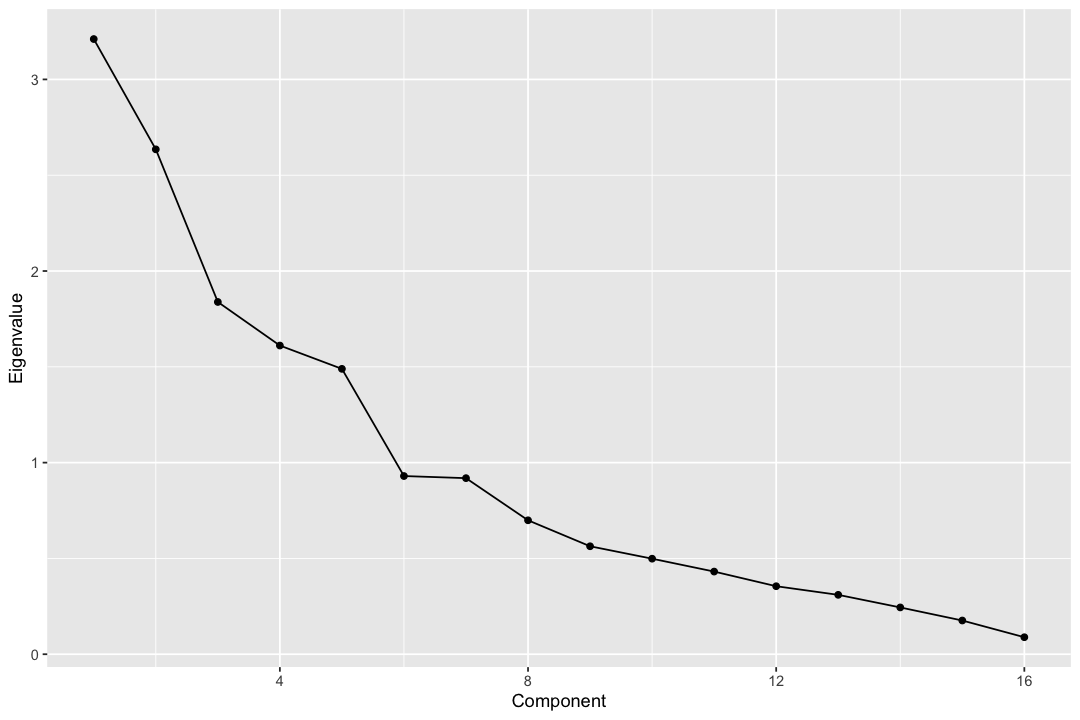

In [11]:
# Pretty Scree Plot with ggplot!
eigen_values %>%
  ggplot(aes(x=1:nrow(.), y=value)) +
  geom_point() +
  geom_line() +
  scale_y_continuous(name = "Eigenvalue") + 
  scale_x_continuous(name = "Component")

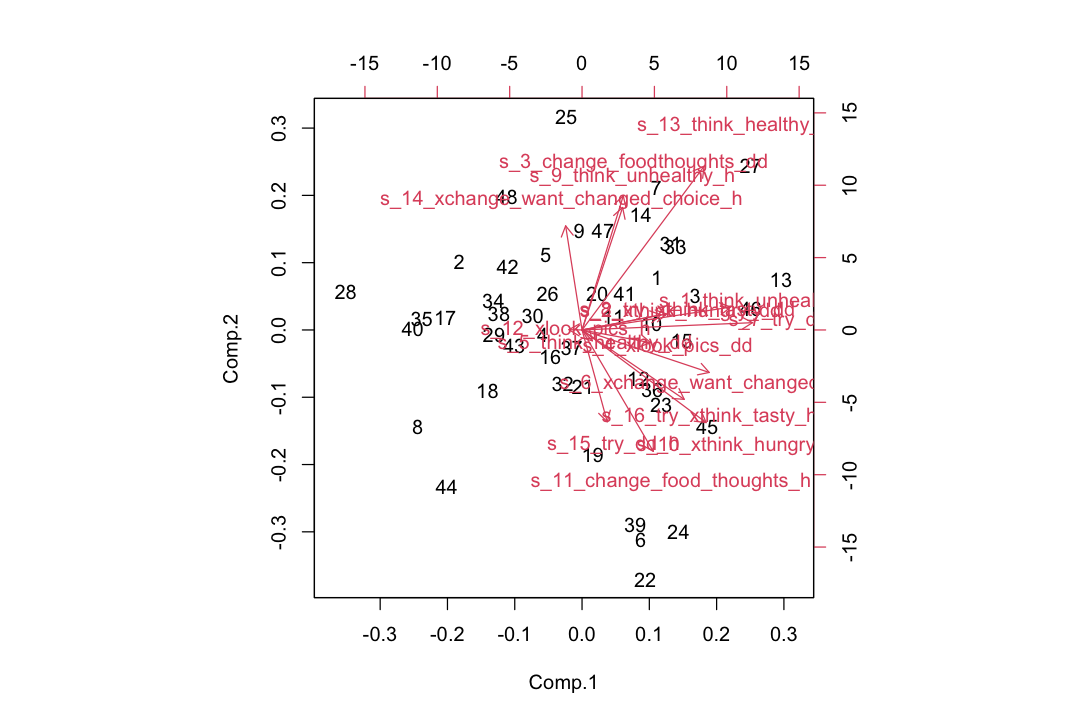

In [12]:
# R Extra: Plots the items as vectors in component space!
pca %>% 
  biplot

## Exploratory Factor Analysis (EFA)

In [20]:
efa = factor_data %>%
  factanal(5, rotation = "promax")
efa %>%
  loadings


Loadings:
                                   Factor1 Factor2 Factor3 Factor4 Factor5
s_1_think_unhealthy_dd              0.128           0.127   0.103   0.637 
s_2_xthink_hungry_dd               -0.144  -0.297                   0.868 
s_3_change_foodthoughts_dd          0.658   0.117   0.102  -0.132  -0.172 
s_4_xlook_pics_dd                   0.266           1.054  -0.128         
s_5_think_healthy_dd               -0.149   0.335  -0.325                 
s_6_xchange_want_changed_choice_dd  0.245   0.255  -0.126   0.977         
s_7_try_dd_dd                       0.232   0.533  -0.167   0.260   0.220 
s_8_try_xthink_tasty_dd                             0.273  -0.147   0.386 
s_9_think_unhealthy_h               0.785           0.163          -0.119 
s_10_xthink_hungry_h                        0.953           0.153  -0.238 
s_11_change_food_thoughts_h        -0.159   0.291   0.279   0.326  -0.169 
s_12_xlook_pics_h                  -0.115   0.210          -0.413         
s_13_think_hea

---
# Factor Analysis: Condition Effects

---

## Examine Raw Associations Between Items

In [21]:
# Create a dataset of only the items that will be used in the factor analysis
factor_data = dataset %>%
    select(starts_with("ce_")) %>%
    drop_na # Listwise deletion to remove rows with missing responses

# Create a correlation matrix
factor_data %>% 
  correlate


Correlation method: 'pearson'
Missing treated using: 'pairwise.complete.obs'




rowname,ce_1_diff_nat,ce_2_focus_h_nat,ce_3_focus_dd_nat,ce_4_diff_dd,ce_5_focus_h_dd,ce_6_focus_reduce_craving_dd,ce_7_success_control_response_dd,ce_8_diff_h,ce_9_focus_h_h,ce_10_focus_reduce_craving_h,ce_11_success_control_response_h
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ce_1_diff_nat,NA,0.28204534,0.17940694,0.12898425,-0.01589405,0.08550073,-0.093130065,-0.07302058,0.11570404,-0.033879721,-0.01844758
ce_2_focus_h_nat,0.28204534,NA,0.08702526,0.13532315,0.14595369,-0.05522177,-0.103086447,-0.50500765,0.39955909,-0.274607521,0.30984392
ce_3_focus_dd_nat,0.17940694,0.08702526,NA,-0.07685867,0.21132810,0.15784763,-0.066505110,0.14650185,-0.16823153,0.190700876,0.03199303
ce_4_diff_dd,0.12898425,0.13532315,-0.07685867,NA,-0.02469561,0.34711889,-0.309265388,0.27363100,0.16888122,-0.242887858,0.22521077
ce_5_focus_h_dd,-0.01589405,0.14595369,0.21132810,-0.02469561,NA,0.09534591,0.060601713,-0.06533456,0.22786958,0.110956478,0.06195042
ce_6_focus_reduce_craving_dd,0.08550073,-0.05522177,0.15784763,0.34711889,0.09534591,NA,0.103847363,0.14738720,0.14218333,-0.114241758,0.06133954
ce_7_success_control_response_dd,-0.09313007,-0.10308645,-0.06650511,-0.30926539,0.06060171,0.10384736,NA,-0.20676545,0.18883098,-0.002549575,0.32280090
ce_8_diff_h,-0.07302058,-0.50500765,0.14650185,0.27363100,-0.06533456,0.14738720,-0.206765446,NA,-0.43892971,0.237886634,-0.28264342
ce_9_focus_h_h,0.11570404,0.39955909,-0.16823153,0.16888122,0.22786958,0.14218333,0.188830982,-0.43892971,NA,0.014686010,0.61658160


## Principal Components Analysis (PCA)

In [22]:
pca = factor_data %>%
  princomp

pca %>%
  summary # Summary for the principal components

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.6386283 1.3676724 1.2689961 1.0403363 1.02426243
Proportion of Variance 0.2521388 0.1756479 0.1512165 0.1016310 0.09851474
Cumulative Proportion  0.2521388 0.4277866 0.5790032 0.6806342 0.77914890
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.92251721 0.69919363 0.62183221 0.53752540 0.46836400
Proportion of Variance 0.07991488 0.04590644 0.03630991 0.02713168 0.02059898
Cumulative Proportion  0.85906378 0.90497023 0.94128013 0.96841182 0.98901080
                         Comp.11
Standard deviation     0.3420927
Proportion of Variance 0.0109892
Cumulative Proportion  1.0000000

In [23]:
pca %>%
  loadings # Summary for items. Ignore the proportion of variance and cumulative variance in this output


Loadings:
                                 Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
ce_1_diff_nat                                          0.115  0.123       
ce_2_focus_h_nat                  0.686 -0.177  0.149  0.258  0.348       
ce_3_focus_dd_nat                       -0.230  0.427  0.474         0.613
ce_4_diff_dd                      0.167  0.572  0.497 -0.264  0.157 -0.121
ce_5_focus_h_dd                         -0.385  0.483        -0.638 -0.422
ce_6_focus_reduce_craving_dd             0.166  0.271 -0.153 -0.221  0.353
ce_7_success_control_response_dd        -0.187 -0.174 -0.376 -0.284  0.419
ce_8_diff_h                      -0.429  0.312  0.335                     
ce_9_focus_h_h                    0.207 -0.109        -0.355              
ce_10_focus_reduce_craving_h     -0.447 -0.511  0.267 -0.275  0.530 -0.157
ce_11_success_control_response_h  0.234         0.120 -0.502  0.134  0.303
                                 Comp.7 Comp.8 Comp.9 Comp.10 Comp.11
ce_1_diff_nat      

In [24]:
# Create a Scree Plot
# Save eigen values 
eigen_values = factor_data %>% 
  cor %>% # I'm using cor() here instead of correlate(), because it creates a matrix by default, which is what eigen() wants as input
  eigen %>% # Converts correlation matrix to Eigenvalues
  .$values %>% # Specifically extract the Eigenvalues, which are just one "value" from the output of the eigen() function
  as_tibble  # Convert the eigenvalues output to a dataframe-like "tibble"

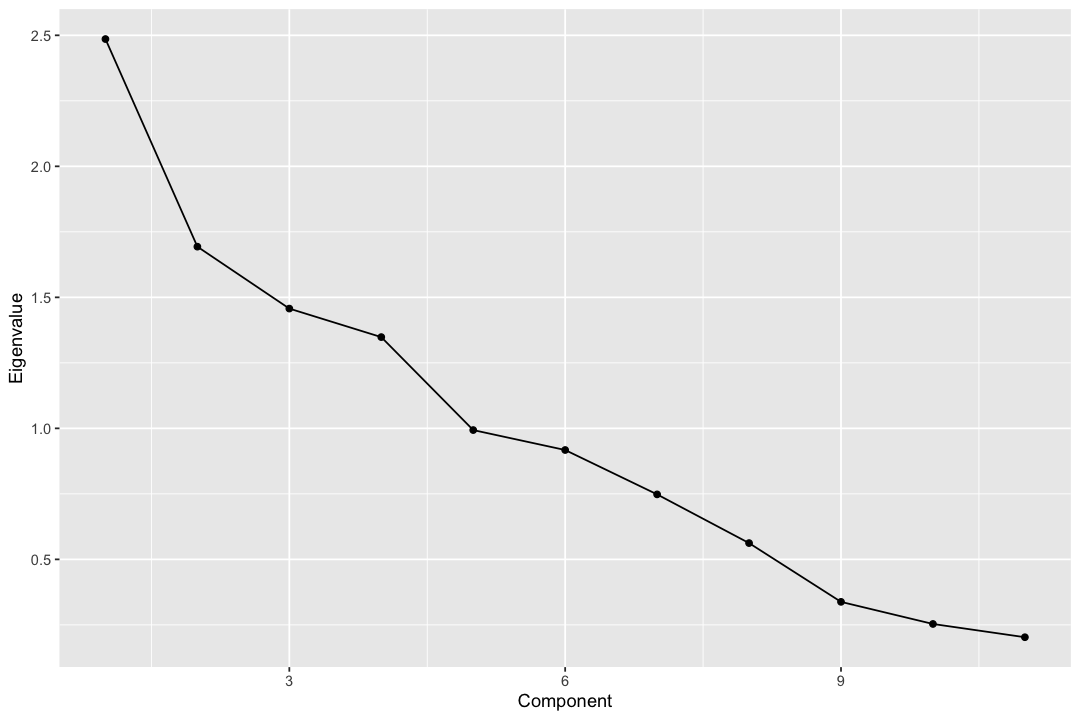

In [25]:
# Pretty Scree Plot with ggplot!
eigen_values %>%
  ggplot(aes(x=1:nrow(.), y=value)) +
  geom_point() +
  geom_line() +
  scale_y_continuous(name = "Eigenvalue") + 
  scale_x_continuous(name = "Component")

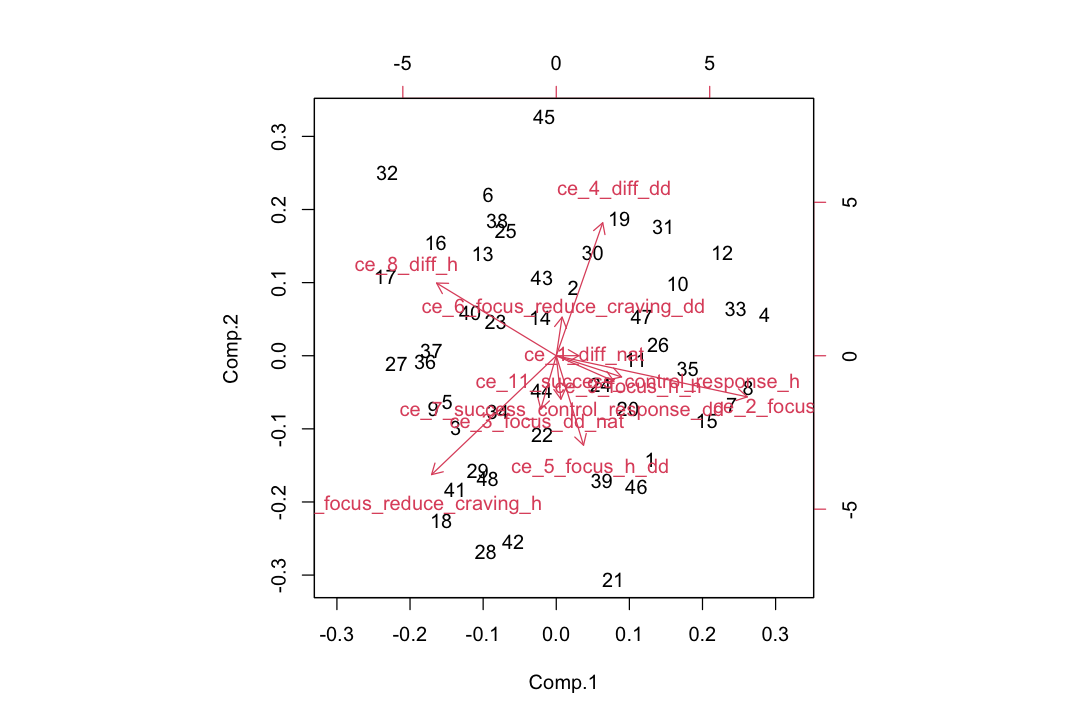

In [26]:
# R Extra: Plots the items as vectors in component space!
pca %>% 
  biplot

## Exploratory Factor Analysis (EFA)

In [27]:
efa = factor_data %>%
  factanal(5, rotation = "promax")
efa %>%
  loadings


Loadings:
                                 Factor1 Factor2 Factor3 Factor4 Factor5
ce_1_diff_nat                                    -0.231   0.201         
ce_2_focus_h_nat                  0.112          -0.739   0.154  -0.143 
ce_3_focus_dd_nat                -0.198                   1.027         
ce_4_diff_dd                              0.983                  -0.133 
ce_5_focus_h_dd                   0.254                   0.213         
ce_6_focus_reduce_craving_dd              0.370   0.136   0.158   0.164 
ce_7_success_control_response_dd         -0.145                   1.005 
ce_8_diff_h                      -0.190   0.332   0.647                 
ce_9_focus_h_h                    1.023                  -0.177         
ce_10_focus_reduce_craving_h      0.331  -0.278   0.524   0.132  -0.127 
ce_11_success_control_response_h  0.467   0.194  -0.128           0.243 

               Factor1 Factor2 Factor3 Factor4 Factor5
SS loadings      1.542   1.371   1.338   1.255   1.168
Pr